Loading diabetes dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
diabetes_df= pd.read_csv("diabetes_clean.csv")
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#  Split into training and test sets
from sklearn.model_selection import train_test_split 

X=diabetes_df[["bmi" , "age"]].values
y=diabetes_df["diabetes"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


#### applying Logistic Regression

In [4]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train ,y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
y_pred = logreg.predict(X_test)

print(y_pred_probs[:10])

[0.28460039 0.56085879 0.33436004 0.23143063 0.00991472 0.26068394
 0.72355048 0.24526952 0.1729711  0.63601845]


#### Draw ROC Curve

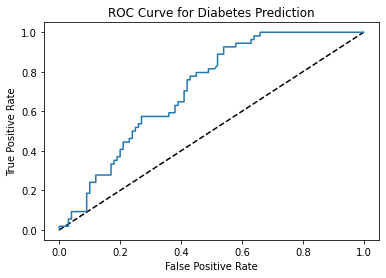

In [5]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

#### Calculate AUC : The area under the <br>  print the confusion matrix and the classification repot

In [6]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix , classification_report
# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.7106481481481481
[[82 18]
 [35 19]]
              precision    recall  f1-score   support

           0       0.70      0.82      0.76       100
           1       0.51      0.35      0.42        54

    accuracy                           0.66       154
   macro avg       0.61      0.59      0.59       154
weighted avg       0.64      0.66      0.64       154

